This section is about **linear regression** and looks at a data set of mens 100m winning times since 1896. We will plot the data and try to find some bad and good models.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

N = np.arange(1, 28);
years = np.array([1896, 1900, 1904, 1906, 1908, 1912, 
                  1920, 1924, 1928, 1932, 1936, 1948, 
                  1952, 1956, 1960, 1964, 1968, 1972, 
                  1976, 1980, 1984, 1988, 1992, 1996,
                  2000, 2004, 2008
                ]);
data = np.array([
    12.00, 11.00, 11.00, 11.20, 10.80,
    10.80, 10.80, 10.60, 10.80, 10.30,
    10.30, 10.30, 10.40, 10.50, 10.20,
    10.00, 9.95, 10.14, 10.06, 10.25, 
    9.99, 9.92, 9.96, 9.84, 9.87, 9.85,
    9.69
])

print("N:{0}\nyears:{1}\ndata:{2}\n".format(N, years, data))
print("N shape: {0}\nyears shape:{1}\ndata shape:{2}".format(N.shape, years.shape, data.shape))



N:[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27]
years:[1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956 1960
 1964 1968 1972 1976 1980 1984 1988 1992 1996 2000 2004 2008]
data:[ 12.    11.    11.    11.2   10.8   10.8   10.8   10.6   10.8   10.3   10.3
  10.3   10.4   10.5   10.2   10.     9.95  10.14  10.06  10.25   9.99
   9.92   9.96   9.84   9.87   9.85   9.69]

N shape: (27,)
years shape:(27,)
data shape:(27,)


We map this using the simple **function** $$ t = f(x) $$ and plot it

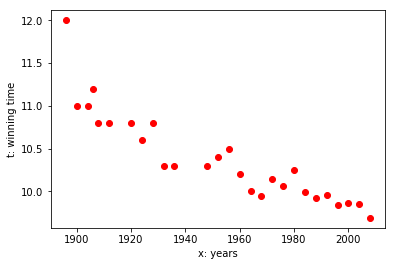

In [3]:
plt.figure();
plt.plot(years, data, 'ro');
plt.xlabel("x: years");
plt.ylabel("t: winning time");
plt.show();

Now, that we have the data plotted, we want to attempt to **fit** another **function** to this data, also called modelling. If we make a very good **model** of this data, we can predict values in the future, beyond 2008 in this case. The incentive behind this is pretty simple, just imagine if you we're able to model the stock market just remotely accurate.

There is a lot of ways to do this, we will start out with the most simple one called **linear fitting** which is basically just trying to **fit** a **straight line** to the plotted data. The equation of a line is $ y = mx + c $, **m** and **c** in this case is **parameters**, it is a big theme in machine learning to define **parameters** based on the data. The notation for a **function** that acts on **x** and has parameters **m** and **c** is $ t = f(x;m;c) $. 

I cheated a bit and just plotted the most accurate values in the chart below where $ c = 36.416 \land m = -0.013 $, just so you can get an intuition about which direction we want to go. The question still remains though, how do we find these parameters **m** and **c**. It is also apparent in this **model** that we assume the winning time of the runners will decrease in a linear fashion, more accurately by $ f'(x) = -0.013 $ every year, so if the derivative entuition is not enough to prove that this model is invalid, we could simply set $ f(x) = 0 $: $$ solve(36.416 - 0.013x = 0,x) = 2801.23 $$ Meaning that late february in year 2801 men will be so good at running these 100m races that the winning time will be 0 seconds, which means that it is not the most accurate model, not in the long run atleast. Anyway, lets find out how we found these parameters **m** and **c**.

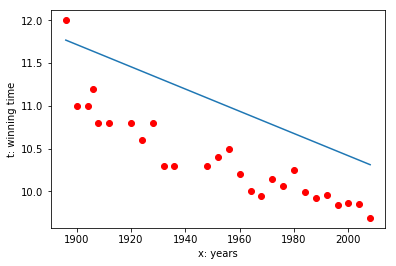

In [4]:
def rough_linear_estimate(x):
    return  36.416 - 0.013 * x;

linear_line = np.array([]);

for x in years:
    linear_line = np.append(linear_line, rough_linear_estimate(x))

plt.figure();
plt.plot(years, data, 'ro');
plt.plot(years, linear_line);

plt.xlabel("x: years");
plt.ylabel("t: winning time");
plt.show();

In order to find the **best** parameters of this model, we have to define what **best** means, a common way to estimate this is by calculating the distance from the **line** at every $ y_{n} $ to each $ t_{n} $ value. Formally known as the **squared difference** and annotated by 
$$ (t_{n} - f(x_{n};m;c))^{2} $$
Now if we had to calculate this for every **m**,**x** and **c** values in a brute force manner, we would have to create an almost infinite loop. So we need some better way of calculating this.

We will use $\mathcal{L}_{n} $ (Read as the Lagrange symbol) to denote loss functions, so in the case where we want to calculate the difference of a single entry(n) it would look like this:

$$ \mathcal{L}_{n}(t_{n},f(x_{n};m;c)) = (t_{n} - f(x_{n};m;c))^{2} $$ 

It is only interesting when we look at the $ \frac{1}{N} \sum$ of all of these differences, we denote this with $$ \mathcal{L} =  \frac{1}{N} \sum^{N}_{n=1} \mathcal{L}_{n}(t_{n},f(x_{n};m;c)) $$

The parameter combination giving us the lowest average distance is our optimal parameters, getting to this result we denote $$ argmin_{m, c} \text{ }  \frac{1}{N} \sum^{N}_{n=1} \mathcal{L}_{n}(t_{n}, f(x_{n};m;c))$$

which basically just means finding the parameters **c** and **m** which **minimizes** the average squared loss. 

Something that could be interesting is to see what the difference is between the **average loss** value vs the **average squared loss** to see why we have to square it. 



In [5]:
def average_loss(data, model):
    sum = 0.0;
    for n in range(data.shape[0]):
        sum += data[n] - model[n];
    return sum / data.shape[0]

def average_loss_squared(data, model):
    sum = 0.0;
    for n in range(data.shape[0]):
        sum += (data[n] - model[n]) ** 2;
    return sum / data.shape[0]

avg_loss = average_loss(data, linear_line);
avg_loss_sqr = average_loss_squared(data, linear_line);
print("Avg loss:{0}\nAvg loss squared:{1}\n".format(avg_loss, avg_loss_sqr))

Avg loss:-0.6455555555555534
Avg loss squared:0.4671832592592563



So we can see that without the square, we can get negative values which doesn't really make sense when dealing with distances, If we square it, we will always get a positive result. 
A common alternative is the **absolute loss** denoted $$ \mathcal{L}_{n} = |t_{n} - f(x_{n};c;m)|$$

What we're interested in though is to unpack these formulars all the way, so that we can find the **partial derivatives** 
of our parameters. Setting a **partial derivative** equal to zero gives us turning points which could be a minima. 

$$ \mathcal{L} = \frac{1}{N} \sum^{N}_{n=1} \mathcal{L}_{n}(t_{n}, f(x_{n};m;c)) $$
$$   = \frac{1}{N} \sum^{N}_{n=1} (t_{n} - f(x_{n};m;c))^{2} $$
$$   = \frac{1}{N} \sum^{N}_{n=1} (t_{n} - (c + x_{n}m))^{2} $$
$$   = \frac{1}{N} \sum^{N}_{n=1} (t_{n} - (c + x_{n}m))(t_{n}-(c + x_{n}m) $$

